# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

os.chdir("../")   # change directory to import a shared output directory and API Key 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "Weatherpy/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

baseURL = "https://api.openweathermap.org/data/2.5/weather?"  # base URL for weatherAPI
units = 'imperial'       # Units for displaying weather in fahrenheit

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

citiesToProcess = pd.DataFrame (cities, columns = ['City'])

#setup the remaining columns 
citiesToProcess["Lat"]="" 
citiesToProcess["Lng"]="" 
citiesToProcess["Max Temp"]="" 
citiesToProcess["Humidity"]="" 
citiesToProcess["Cloudiness"]="" 
citiesToProcess["Wind Speed"]="" 
citiesToProcess["Country"]="" 
citiesToProcess["Date"]="" 
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,,,,,,,,
1,paamiut,,,,,,,,
2,ust-tsilma,,,,,,,,
3,viligili,,,,,,,,
4,illoqqortoormiut,,,,,,,,


In [3]:
len(cities) # the length of expected items

613

In [4]:
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,,,,,,,,
1,paamiut,,,,,,,,
2,ust-tsilma,,,,,,,,
3,viligili,,,,,,,,
4,illoqqortoormiut,,,,,,,,


### Perform API Calls
Process cities that are betwen latitude and longitude range

In [5]:
 # setup parameters for passing to API to generate URL based on respective city passed into URL
baseURL = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"

parameters = {
      "units":units,
     "appid":weather_api_key,
}
group = 1
recordCount = 1

print (f"Beginning Data Retrieval ")
print (f"------------------------ ")
for index, row in citiesToProcess.iterrows():
    #print(index)
    if recordCount <= 50 :
        parameters['q'] = citiesToProcess.loc[index,'City']
    
        print (f"Processing Record {recordCount} of Set  {group} | {citiesToProcess.loc[index,'City']} ")
        getCityData = requests.get(baseURL,params=parameters).json()

        try:
            #grab infomration from results key 
            citiesToProcess.loc[index,'City']=getCityData['name']
            citiesToProcess.loc[index,'Lat']=getCityData['coord']['lat']
            citiesToProcess.loc[index,'Lng']=getCityData['coord']['lon']
            citiesToProcess.loc[index,'Max Temp']=getCityData['main']['temp_max']
            citiesToProcess.loc[index,'Humidity']=getCityData['main']['humidity']
            citiesToProcess.loc[index,'Cloudiness']=getCityData['clouds']['all']
            citiesToProcess.loc[index,'Wind Speed']=getCityData['wind']['speed']
            citiesToProcess.loc[index,'Country']=getCityData['sys']['country']
            citiesToProcess.loc[index,'Date']=getCityData['dt']
            
            recordCount +=1   # control count for the conditional 
            time.sleep(2)   # pause between number of records processed

        except (KeyError,IndexError):
            print("City not found. Skipping...")
    else:
        recordCount  = 1
        group += 1
        
            

    #Processing Record 1 of Set 1 | butaritari
    
print (f"------------------------ ")
print (f"Data Retrieval Complete ")
print (f"------------------------ ")
    


Beginning Data Retrieval 
------------------------ 
Processing Record 1 of Set  1 | aklavik 
Processing Record 2 of Set  1 | paamiut 
Processing Record 3 of Set  1 | ust-tsilma 
Processing Record 4 of Set  1 | viligili 
City not found. Skipping...
Processing Record 4 of Set  1 | illoqqortoormiut 
City not found. Skipping...
Processing Record 4 of Set  1 | preobrazheniye 
Processing Record 5 of Set  1 | hobart 
Processing Record 6 of Set  1 | ayame 
Processing Record 7 of Set  1 | dzilam gonzalez 
Processing Record 8 of Set  1 | lebu 
Processing Record 9 of Set  1 | vaini 
Processing Record 10 of Set  1 | yellowknife 
Processing Record 11 of Set  1 | tessalit 
Processing Record 12 of Set  1 | kapaa 
Processing Record 13 of Set  1 | ushuaia 
Processing Record 14 of Set  1 | bowen 
Processing Record 15 of Set  1 | broken hill 
Processing Record 16 of Set  1 | provideniya 
Processing Record 17 of Set  1 | saint-philippe 
Processing Record 18 of Set  1 | osorno 
Processing Record 19 of Set 

Processing Record 22 of Set  4 | mizusawa 
Processing Record 23 of Set  4 | salalah 
Processing Record 24 of Set  4 | longlac 
City not found. Skipping...
Processing Record 24 of Set  4 | sao jose da coroa grande 
Processing Record 25 of Set  4 | te anau 
Processing Record 26 of Set  4 | ruthin 
Processing Record 27 of Set  4 | cabra 
Processing Record 28 of Set  4 | bandarbeyla 
Processing Record 29 of Set  4 | brae 
Processing Record 30 of Set  4 | arrecife 
Processing Record 31 of Set  4 | gribanovskiy 
Processing Record 32 of Set  4 | pisco 
Processing Record 33 of Set  4 | isangel 
Processing Record 34 of Set  4 | barentsburg 
City not found. Skipping...
Processing Record 34 of Set  4 | honningsvag 
Processing Record 35 of Set  4 | kieta 
Processing Record 36 of Set  4 | santiago del estero 
Processing Record 37 of Set  4 | la ronge 
Processing Record 38 of Set  4 | inuvik 
Processing Record 39 of Set  4 | haradok 
Processing Record 40 of Set  4 | pochutla 
Processing Record 41 of

Processing Record 37 of Set  7 | shiyan 
Processing Record 38 of Set  7 | tateyama 
Processing Record 39 of Set  7 | san quintin 
Processing Record 40 of Set  7 | maykain 
City not found. Skipping...
Processing Record 40 of Set  7 | mvuma 
Processing Record 41 of Set  7 | mayumba 
Processing Record 42 of Set  7 | deoria 
Processing Record 43 of Set  7 | kailua 
Processing Record 44 of Set  7 | buraydah 
Processing Record 45 of Set  7 | dossor 
Processing Record 46 of Set  7 | port-de-paix 
City not found. Skipping...
Processing Record 46 of Set  7 | kuche 
City not found. Skipping...
Processing Record 46 of Set  7 | biak 
Processing Record 47 of Set  7 | santa rosa 
Processing Record 48 of Set  7 | ormara 
Processing Record 49 of Set  7 | kerch 
Processing Record 50 of Set  7 | namatanai 
Processing Record 1 of Set  8 | weligama 
Processing Record 2 of Set  8 | magadan 
Processing Record 3 of Set  8 | zonguldak 
Processing Record 4 of Set  8 | yerbogachen 
Processing Record 5 of Set  8

Processing Record 8 of Set  11 | ilebo 
Processing Record 9 of Set  11 | inderborskiy 
City not found. Skipping...
Processing Record 9 of Set  11 | robertson 
Processing Record 10 of Set  11 | shimoda 
Processing Record 11 of Set  11 | barsovo 
Processing Record 12 of Set  11 | ketchikan 
Processing Record 13 of Set  11 | manaure 
Processing Record 14 of Set  11 | tonj 
Processing Record 15 of Set  11 | bela pod bezdezem 
Processing Record 16 of Set  11 | nishihara 
Processing Record 17 of Set  11 | rocha 
Processing Record 18 of Set  11 | hauterive 
Processing Record 19 of Set  11 | korgen 
Processing Record 20 of Set  11 | arman 
Processing Record 21 of Set  11 | kalabo 
Processing Record 22 of Set  11 | vila 
Processing Record 23 of Set  11 | cuamba 
Processing Record 24 of Set  11 | gorontalo 
Processing Record 25 of Set  11 | envira 
Processing Record 26 of Set  11 | yialos 
City not found. Skipping...
Processing Record 26 of Set  11 | saint pete beach 
Processing Record 27 of Set

In [6]:
# Export to CSV 
citiesToProcess.to_csv(output_data_file)


In [7]:
# convert to a dataframe for future Processing
citiesDataDF=pd.DataFrame(citiesToProcess)
citiesDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,64.58,66,100,4.36,CA,1660789755
1,Paamiut,61.994,-49.6678,41.77,88,17,12.3,GL,1660789758
2,Ust-Tsilma,65.441,52.1498,53.98,75,24,4.79,RU,1660789761
3,viligili,,,,,,,,
4,illoqqortoormiut,,,,,,,,


In [8]:
# convert columns to numeric datatype to gather statistics
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
print(citiesDataDF.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object


In [9]:
citiesDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,20.143874,16.200805,67.744025,71.966011,55.114490,8.176440
std,33.850161,90.639046,13.602228,20.253694,39.050805,5.605099
min,-54.800000,-179.166700,33.910000,8.000000,0.000000,0.000000
25%,-7.779150,-62.724550,57.985000,62.000000,16.500000,3.880000
50%,22.933300,18.423200,69.150000,76.000000,61.000000,6.910000
75%,50.008450,93.175000,78.900000,87.000000,99.000000,11.330000
max,78.218600,179.316700,101.680000,100.000000,100.000000,29.150000


In [10]:
#  Get the indices of cities that have humidity over 100%.
hudmidityOver100 =citiesDataDF[(citiesDataDF['Humidity'] > 100)].index
print (hudmidityOver100)


Int64Index([], dtype='int64')


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data
clean_city_data = citiesDataDF.drop(hudmidityOver100, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,64.58,66.0,100.0,4.36,CA,1660789755
1,Paamiut,61.9940,-49.6678,41.77,88.0,17.0,12.30,GL,1660789758
2,Ust-Tsilma,65.4410,52.1498,53.98,75.0,24.0,4.79,RU,1660789761
3,viligili,NaN,NaN,NaN,NaN,NaN,NaN,,
4,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,,


In [12]:
# Assign variable for plotting
lat = clean_city_data["Lat"]
lng = clean_city_data["Lng"]
MaxTemp= clean_city_data["Max Temp"]
Humidity = clean_city_data["Humidity"]
Cloudiness = clean_city_data["Cloudiness"]
WindSpeed = clean_city_data["Wind Speed"]


## Plotting the Data


## Latitude vs. Temperature Plot

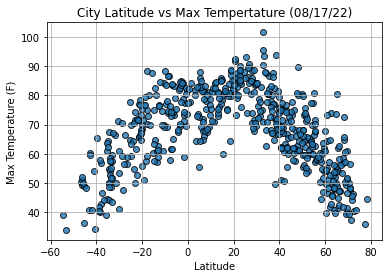

In [13]:
plt.scatter(lat, MaxTemp,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Max Tempertature (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_temp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

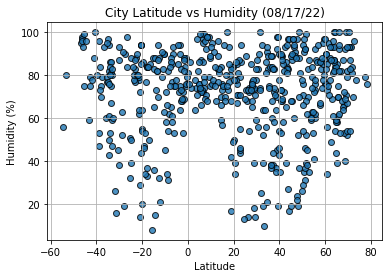

In [14]:
plt.scatter(lat, Humidity,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_humidity.png")

#show plot
plt.show()

This day it was observed that the humditity is high closer to the equatoer there does not appear to be any correction between
the latitude and the humditiy.  Looking at the latitude between -40 and 60  there are a lot of cities with humdidity near 100. 

## Latitude vs. Cloudiness Plot

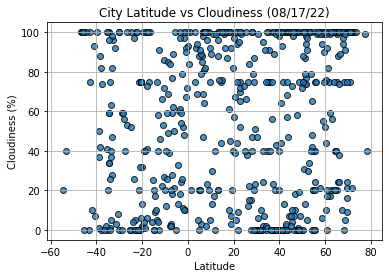

In [15]:
plt.scatter(lat, Cloudiness,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_cloudiness.png")

#show plot
plt.show()

There is no noticable relationship between latitude and cloudiness.  The data indidcates that the cloudiness can occur 
high or low at any latitude

## Latitude vs. Wind Speed Plot

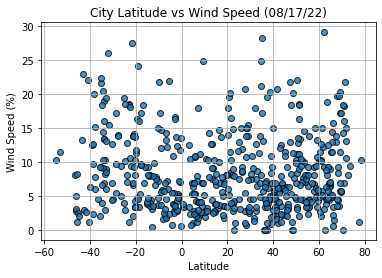

In [16]:
plt.scatter(lat, WindSpeed,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_windspeed.png")

#show plot
plt.show()

## Linear Regression

In [17]:
#create a function to create linear regession plots 
def plot_linear_regression(x_values, y_values,title, text_coordinates):
    #run regression 
    (slope, intercept,rvalue, pvalues,stderr) = linregress(x_values,y_values)
    regress_values=x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel (title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
#create northern and southern Hemisphere data fromes
northernHemiDF = clean_city_data.loc[(clean_city_data["Lat"]>=0)]
southernHemiDF = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5330287524460666


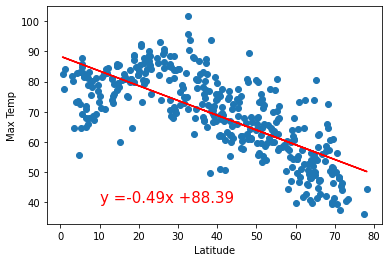

In [19]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(10,40))

The r-value of 0.53 indicates that there is a moderate correlation between max tempatures and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5920668092086898


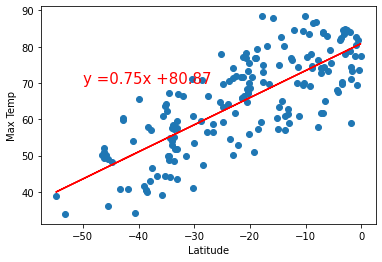

In [20]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-50,70))

The r-value of 0.59 indicates that there is a moderate correlation between the latitude and max tempatures in the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0004483894413629908


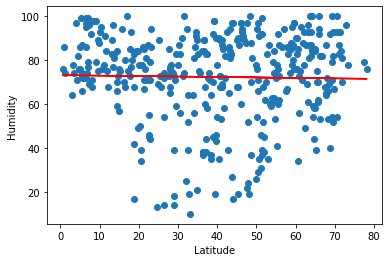

In [27]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(0,5))

The r-value of 0.0004 indicates that there no correlation between latitude and humdity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.003802737673712446


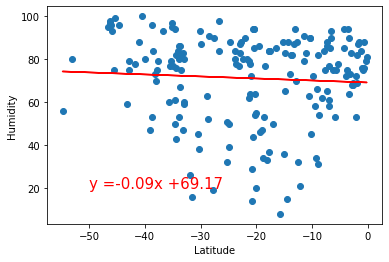

In [22]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(-50,20))

The r-value of 0.004 indicates there is a none or very weak between humditity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0019848960506488825


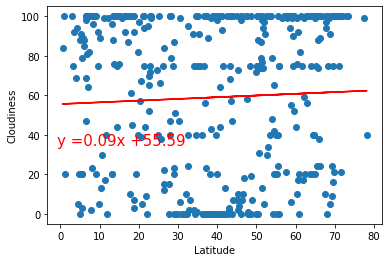

In [23]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-1,35))

The r-value of 0.002 indicates that there is no correlation between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0026932629901495796


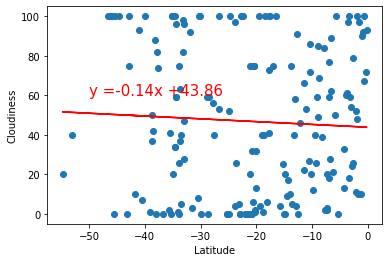

In [24]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-50,60))

The r-value of 0.002 indicates that none or very weak correlation between Cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.022495637168670125


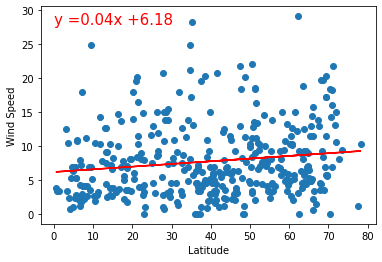

In [25]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(0,28))

The r-value of 0.22 indicates there is none or very week correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031587169396829984


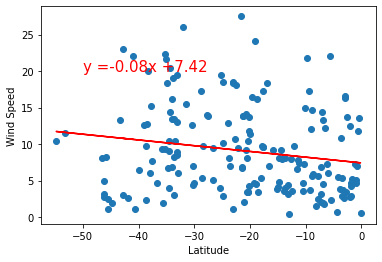

In [26]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,20))

The r-value of 0.32 indicates that there is weak correlation between wind speed and latitude in the southern hemisphere